In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import xarray as xr

# Eruption Data

In [2]:
# Data set of confirmed eruptions in every country
volc_data = pd.read_csv('GVP_Eruption_Results.csv')
# Only get data from 1959-2021
years = np.arange(1959,2022)
volc_data = volc_data[volc_data['Start Year'].notna()]

# Make year column
volc_data['Start Year'] = [int(year) for year in volc_data['Start Year']]
counts = []
# Make number of eruptions column
for year in years:
    count = list(volc_data['Start Year']).count(year)
    counts.append(count)

df = pd.DataFrame({'Year': years, 'Eruptions': counts})
# Export to csv
df.to_csv('Eruptions.csv', index=False)

# Solar Data

In [3]:
#Yearly TSI calculated using NRL2 solar irradiance model
# Read NetCDF file
ds = xr.open_dataset('solar.nc')
# Convert to data frame
df = ds.to_dataframe()
# Get TSI values
TSI_vals = np.array(df['TSI'][:412])
# Get list of years
years = list(np.arange(1610,2022)) 
# Create data frame of years and TSI
full_df = pd.DataFrame({'Year': years, 'TSI': TSI_vals})
# Turn a portion of the data frame into a csv
full_df.iloc[349:].to_csv('Solar.csv', index=False)

C:\Users\jillv\Anaconda3\lib\site-packages\xarray\coding\times.py:427: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
C:\Users\jillv\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


# Temperature Data

In [4]:
temp = pd.read_csv("GLB.Ts+dSST.csv",skiprows=1)
# Only get temperature data from 1959-2021
subset_temp = temp.loc[(temp['Year'] >= 1959) & (temp['Year'] < 2022)]
# Create new dataframe with only average temperatures per year
temp = pd.DataFrame({'Year': subset_temp['Year'], 'avg_temp':subset_temp['J-D']})

# Put it all together

In [5]:

solar = pd.read_csv("Solar.csv")
eruptions = pd.read_csv("Eruptions.csv")
# co2 data
co2= pd.read_csv("co2_annmean_mlo.csv", skiprows=55)
# Create a data frame containing all variables
all_data=pd.DataFrame({'year': solar['Year'], 'TSI':solar['TSI'], 'avg_temp':np.array(temp['avg_temp']),
                      'co2':co2['mean'], 'eruptions': eruptions['Eruptions']})
# Make sure everything is numeric
all_data.apply(pd.to_numeric)

,year,TSI,avg_temp,co2,eruptions
0,1959,1361.5613,0.03,315.98,37
1,1960,1361.4275,-0.03,316.91,35
2,1961,1360.9957,0.06,317.64,32
3,1962,1360.7981,0.03,318.45,29
4,1963,1360.7325,0.05,318.99,40
...,...,...,...,...,...
58,2017,1360.6597,0.92,406.76,32
59,2018,1360.6387,0.84,408.72,37
60,2019,1360.6492,0.97,411.66,26
61,2020,1360.7491,1.01,414.24,27


In [6]:
all_data.to_csv('all_data.csv', index=False) # save as csv

# Pairs plot

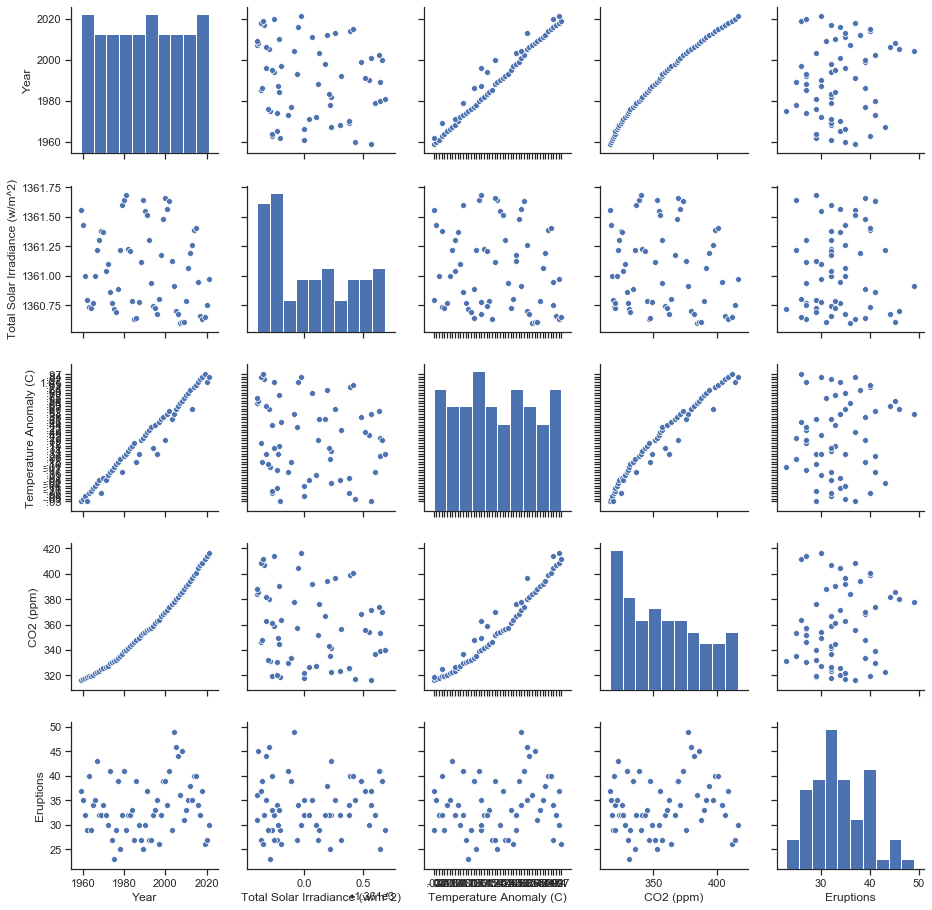

In [7]:
# pairs plot
all_data.columns=["Year","Total Solar Irradiance (w/m^2)","Temperature Anomaly (C)","CO2 (ppm)", "Eruptions" ]
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(all_data, diag_kws={'bins': 10})

